# 🧪 Exploratory Data Analysis (EDA)

Bagian ini bertujuan untuk mengeksplorasi dataset awal dan memahami pola-pola penting yang berkaitan dengan **keterlambatan pengiriman barang**. Beberapa hal yang dilakukan dalam eksplorasi ini antara lain:

## 📦 Dataset
Dataset yang digunakan adalah `SCMS_Delivery_History_Dataset.csv` yang berisi informasi pengiriman barang, termasuk nilai, kuantitas, harga, negara tujuan, dan asuransi.

---

## 1. 📚 Import Library
Digunakan library populer seperti:
- `pandas`, `numpy`: manipulasi data
- `matplotlib`, `seaborn`: visualisasi data
- `sklearn`: preprocessing dan model machine learning

---

## 2. 📂 Load Dataset
Dataset dimuat dari path `../data/raw/SCMS_Delivery_History_Dataset.csv` dan langsung dicek ukuran serta preview isi datanya.

---

## 3. 📊 Statistik Deskriptif
- Ditampilkan ringkasan statistik numerik (`mean`, `std`, `min`, `max`, dll)
- Ditampilkan statistik lengkap termasuk untuk kolom kategorikal
- Median tiap kolom numerik dihitung
- Jumlah nilai kosong per kolom dianalisis

---

## 4. 🧼 Informasi Data
- Dilihat tipe data dan jumlah nilai non-null dengan `df.info()`

---

## 5. 📈 Visualisasi Data

### 📌 Histogram
Distribusi seluruh kolom numerik divisualisasikan dalam bentuk histogram untuk melihat penyebaran data dan mendeteksi skewness atau outlier.

### 📌 Boxplot
Kolom numerik seperti:
- `Unit of Measure (Per Pack)`
- `Line Item Quantity`
- `Line Item Value`
- `Pack Price`
- `Unit Price`
- `Line Item Insurance (USD)`

...divisualisasikan dengan boxplot untuk mengidentifikasi **outlier** dan rentang data.

### 📌 Heatmap Korelasi
Korelasi antar fitur numerik divisualisasikan menggunakan heatmap untuk melihat hubungan antar variabel.

### 📌 Barplot
10 negara dengan jumlah pengiriman terbanyak ditampilkan menggunakan barplot untuk analisis kategori.

---

## 🎯 Tujuan Akhir
EDA ini membantu dalam:
- Memahami struktur dan kualitas data
- Menemukan pola, anomali, dan hubungan antar fitur
- Menyusun strategi fitur penting dalam prediksi keterlambatan pengiriman barang

In [13]:
# STEP 1: Import Library yang Dibutuhkan
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
# STEP 2: Load Dataset
df = pd.read_csv('../data/raw/SCMS_Delivery_History_Dataset.csv')
print("Jumlah baris & kolom:", df.shape)
df.head()

Jumlah baris & kolom: (10324, 33)


,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [ ]:
# STEP 3: Informasi Umum Dataset
# Untuk melihat tipe data dan jumlah non-null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

In [16]:
# STEP 4: Statistik Deskriptif
# Statistik deskriptif umum (mean, std, min, max, dll)
print("\n Statistik Deskriptif Numerik")
print(df.describe())


 Statistik Deskriptif Numerik
                 ID  Unit of Measure (Per Pack)  Line Item Quantity  \
count  10324.000000                10324.000000        10324.000000   
mean   51098.968229                   77.990895        18332.534870   
std    31944.332496                   76.579764        40035.302961   
min        1.000000                    1.000000            1.000000   
25%    12795.750000                   30.000000          408.000000   
50%    57540.500000                   60.000000         3000.000000   
75%    83648.250000                   90.000000        17039.750000   
max    86823.000000                 1000.000000       619999.000000   

       Line Item Value    Pack Price    Unit Price  Line Item Insurance (USD)  
count     1.032400e+04  10324.000000  10324.000000               10037.000000  
mean      1.576506e+05     21.910241      0.611701                 240.117626  
std       3.452921e+05     45.609223      3.275808                 500.190568  
min      

In [17]:
# Statistik deskriptif (untuk semua tipe data)
print("\n Statistik Deskriptif Lengkap ")
print(df.describe(include='all'))


 Statistik Deskriptif Lengkap 
                  ID Project Code            PQ #    PO / SO #   ASN/DN #  \
count   10324.000000        10324           10324        10324      10324   
unique           NaN          142            1237         6233       7030   
top              NaN   116-ZA-T30  Pre-PQ Process  SCMS-199289  ASN-19166   
freq             NaN          768            2681           67         54   
mean    51098.968229          NaN             NaN          NaN        NaN   
std     31944.332496          NaN             NaN          NaN        NaN   
min         1.000000          NaN             NaN          NaN        NaN   
25%     12795.750000          NaN             NaN          NaN        NaN   
50%     57540.500000          NaN             NaN          NaN        NaN   
75%     83648.250000          NaN             NaN          NaN        NaN   
max     86823.000000          NaN             NaN          NaN        NaN   

             Country Managed By Fulfill Via

In [18]:
median = df.median(numeric_only=True)
print("\n Median Tiap Kolom:")
print(median)


 Median Tiap Kolom:
ID                            57540.500
Unit of Measure (Per Pack)       60.000
Line Item Quantity             3000.000
Line Item Value               30471.465
Pack Price                        9.300
Unit Price                        0.160
Line Item Insurance (USD)        47.040
dtype: float64


In [19]:
# STEP 5: Cek Missing Values
missing = df.isnull().sum()
print("Jumlah Nilai Kosong (NaN) per Kolom:")
print(missing)

Jumlah Nilai Kosong (NaN) per Kolom:
ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
P

In [20]:
# STEP 6: Cek Jumlah Duplikat
df.duplicated().sum()

0

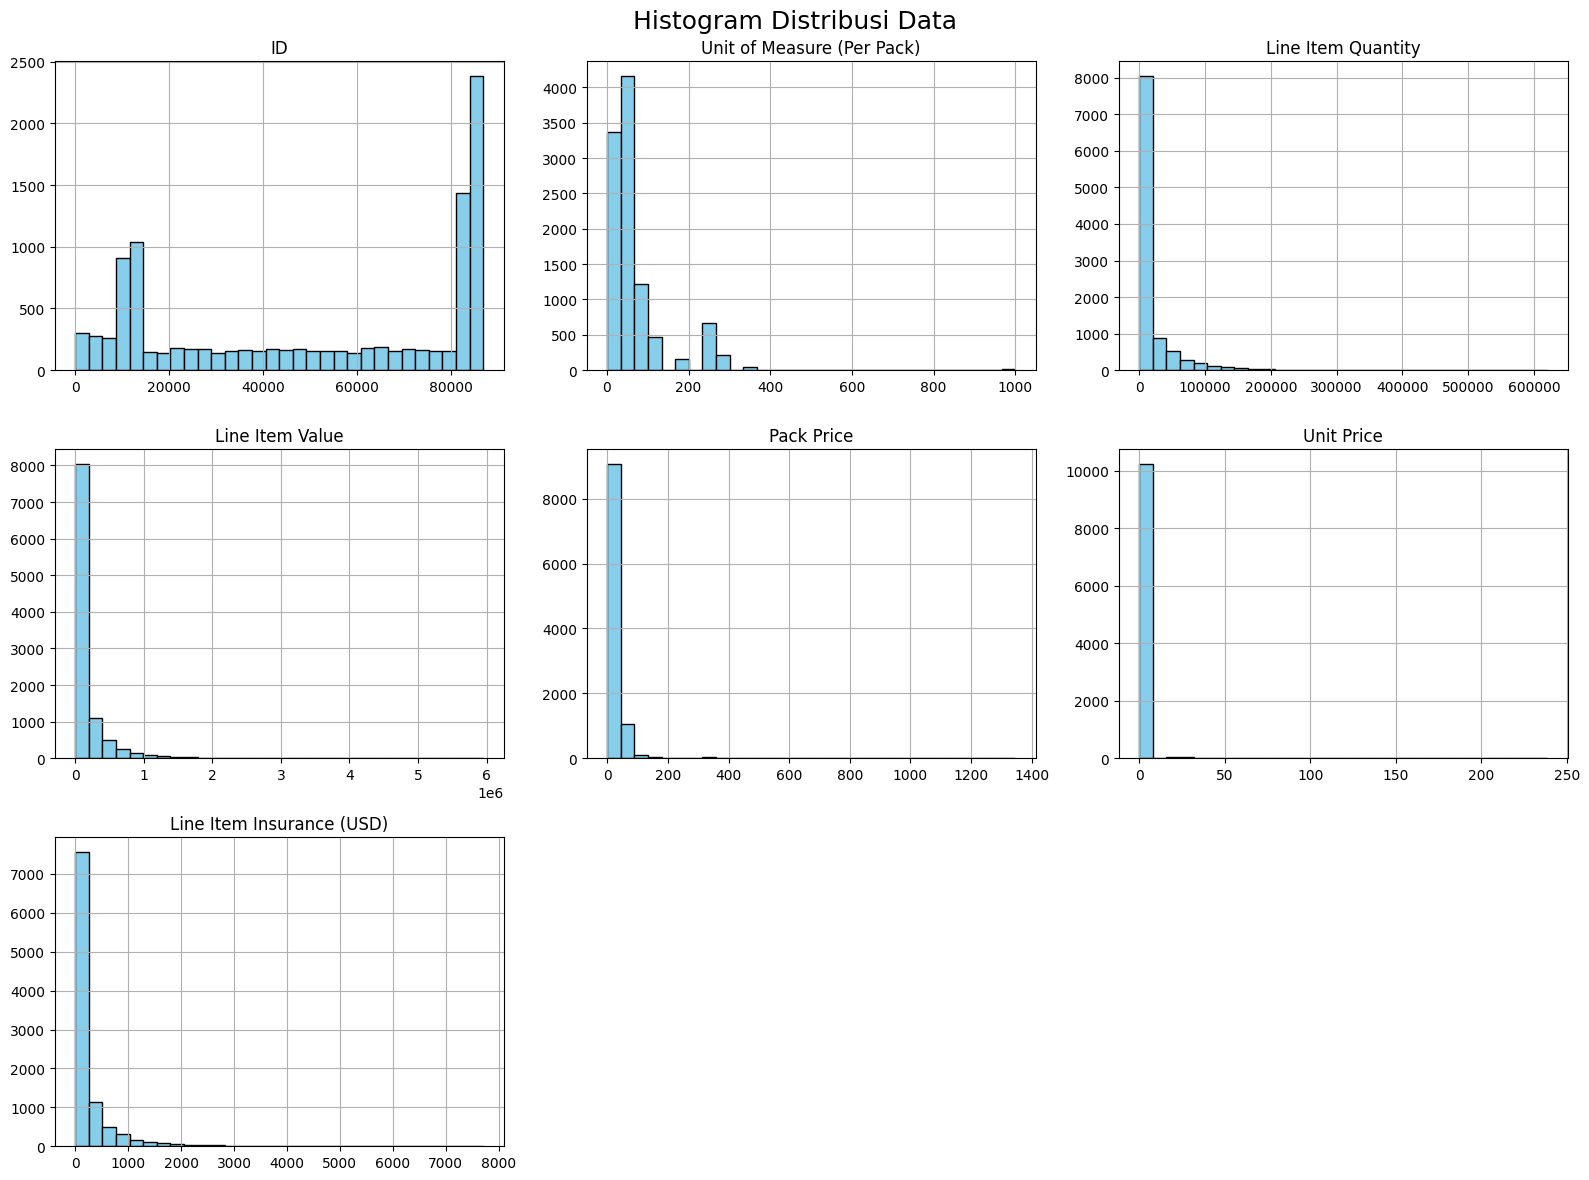

In [21]:
# STEP 7: Visualisasi Data

# Ukuran default visualisasi
plt.rcParams['figure.figsize'] = (10, 6)

# HISTOGRAM untuk semua kolom numerik
df.hist(bins=30, figsize=(16, 12), color='skyblue', edgecolor='black')
plt.suptitle("Histogram Distribusi Data", fontsize=18)
plt.tight_layout()
plt.show()

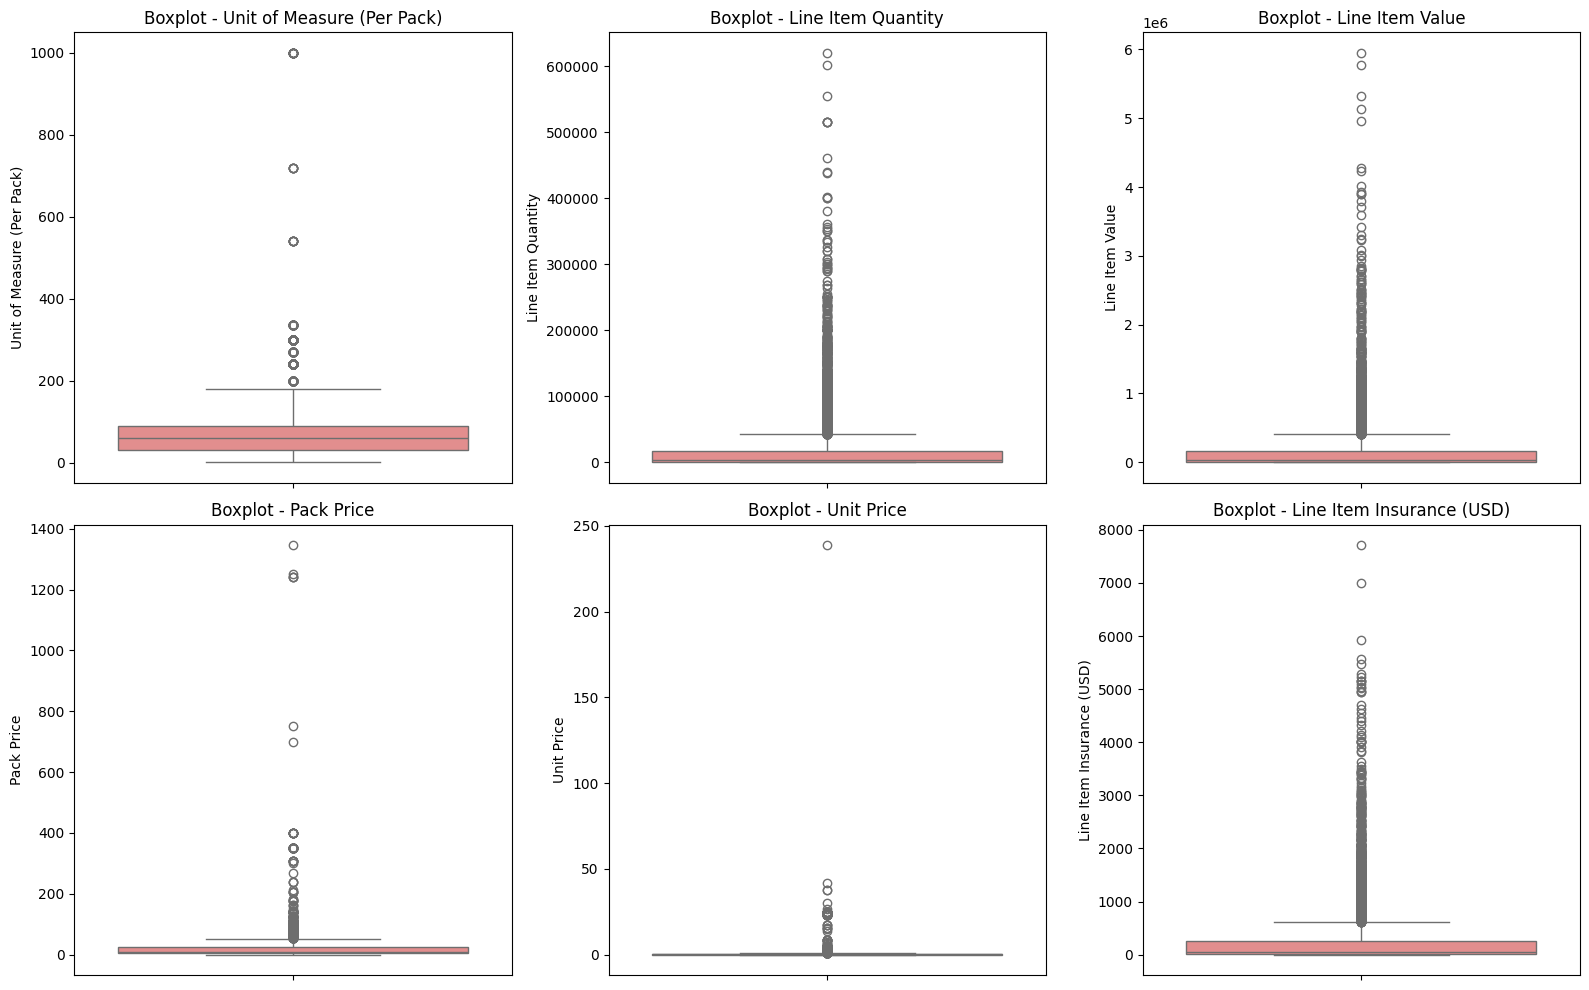

In [22]:
# BOXPLOT untuk kolom numerik tertentu
num_cols = ['Unit of Measure (Per Pack)', 'Line Item Quantity', 'Line Item Value',
            'Pack Price', 'Unit Price', 'Line Item Insurance (USD)']

plt.figure(figsize=(16, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, y=col, color='lightcoral')
    plt.title(f'Boxplot - {col}')
    plt.tight_layout()
plt.show()

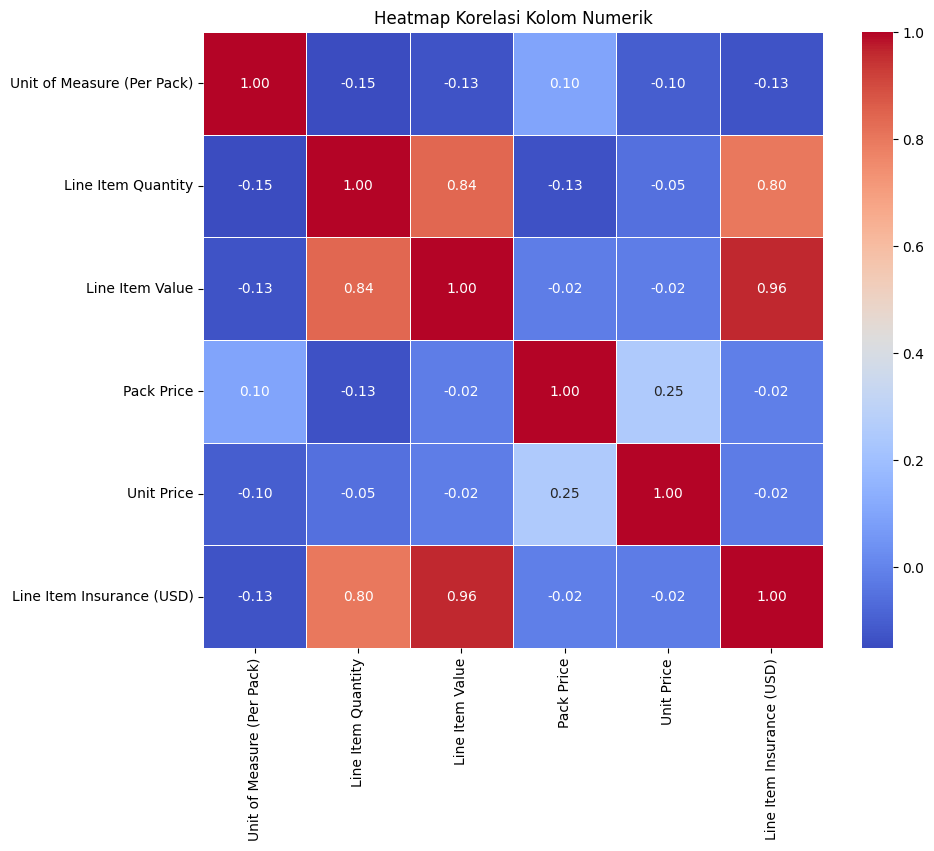

In [31]:
# HEATMAP KORELASI
plt.figure(figsize=(10, 8))
corr = df[num_cols].corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title("Heatmap Korelasi Kolom Numerik")
plt.show()

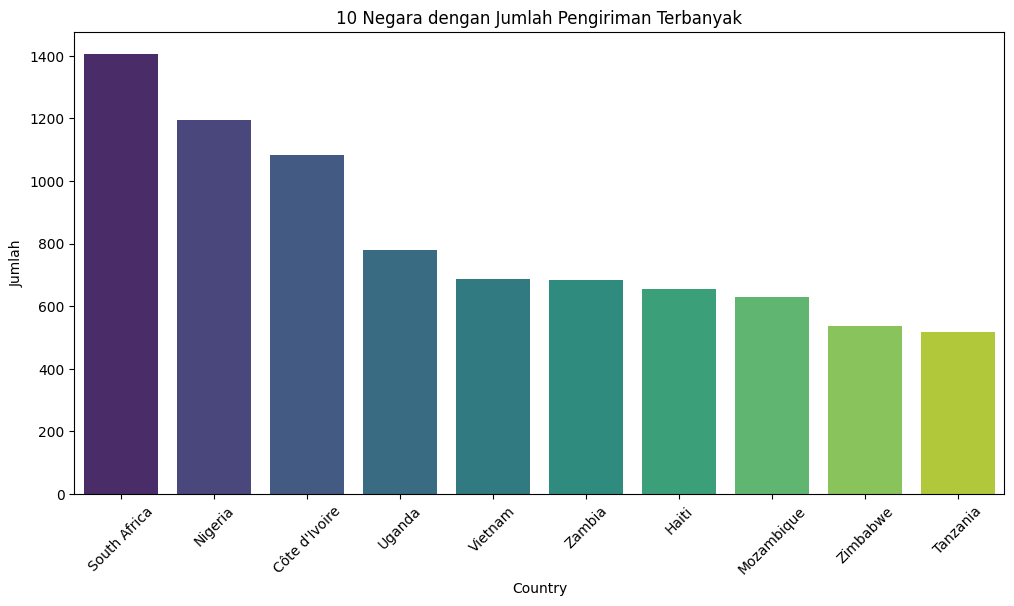

In [23]:
# BARPLOT - 10 negara dengan jumlah pengiriman terbanyak
plt.figure(figsize=(12, 6))
top_countries = df['Country'].value_counts().nlargest(10).reset_index()
top_countries.columns = ['Country', 'Jumlah']

sns.barplot(data=top_countries, x='Country', y='Jumlah', hue='Country', palette='viridis', legend=False)
plt.title("10 Negara dengan Jumlah Pengiriman Terbanyak")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)
plt.show()